# DAT203 Final Project
*Ecommerce Customer Churn Analysis and Prediction*

https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction


Articles:
- https://www.analyticsvidhya.com/blog/2022/06/e-commerce-customer-churn-prediction/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk 
import seaborn as sns

In [2]:
df = pd.read_csv("data/ecommerce_churn.csv")

## Overview

In [3]:
df.shape

(5630, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [5]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [6]:
df.tail()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,225
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179
5629,55630,0,8.0,Mobile Phone,1,15.0,Credit Card,Male,3.0,2,Laptop & Accessory,3,Married,4,0,13.0,2.0,2.0,3.0,169


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.5,54222.75,55630.0
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.0,0.00,1.0
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.0,16.00,61.0
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.0,3.00,3.0
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.0,20.00,127.0
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.0,3.00,5.0
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.0,4.00,6.0
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.0,4.00,5.0
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.0,6.00,22.0
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.0,1.00,1.0


In [8]:
df.describe(include="O").T

,count,unique,top,freq
PreferredLoginDevice,5630,3,Mobile Phone,2765
PreferredPaymentMode,5630,7,Debit Card,2314
Gender,5630,2,Male,3384
PreferedOrderCat,5630,6,Laptop & Accessory,2050
MaritalStatus,5630,3,Married,2986


In [9]:
df.isnull().sum().sort_values(ascending=False)

DaySinceLastOrder              307
OrderAmountHikeFromlastYear    265
Tenure                         264
OrderCount                     258
CouponUsed                     256
HourSpendOnApp                 255
WarehouseToHome                251
CustomerID                       0
MaritalStatus                    0
Complain                         0
NumberOfAddress                  0
PreferedOrderCat                 0
SatisfactionScore                0
Churn                            0
NumberOfDeviceRegistered         0
Gender                           0
PreferredPaymentMode             0
CityTier                         0
PreferredLoginDevice             0
CashbackAmount                   0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
for c in df.columns:
    if df[c].dtypes == 'object':
        print("---------------------------------")
        print(c)
        print()
        print(df[c].value_counts())
        print()
        print()

---------------------------------
PreferredLoginDevice

Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64


---------------------------------
PreferredPaymentMode

Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64


---------------------------------
Gender

Male      3384
Female    2246
Name: Gender, dtype: int64


---------------------------------
PreferedOrderCat

Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64


---------------------------------
MaritalStatus

Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64




In [12]:
df['Churn'].value_counts()

0    4682
1     948
Name: Churn, dtype: int64

In [13]:
df['CityTier'].value_counts()

1    3666
3    1722
2     242
Name: CityTier, dtype: int64

In [14]:
df['Complain'].value_counts()

0    4026
1    1604
Name: Complain, dtype: int64

### Section Summary

- CustomerID can be dropped
- A few columns should be converted from numeric to categorical (Churn, CityTier, Complain)
- Several fields have missing values (dealt with in the next section)
- Replace missing values with the median appears to be sufficient
- Outliers? 

In [15]:
df.drop(['CustomerID'],axis=1, inplace=True)

## Visualizations

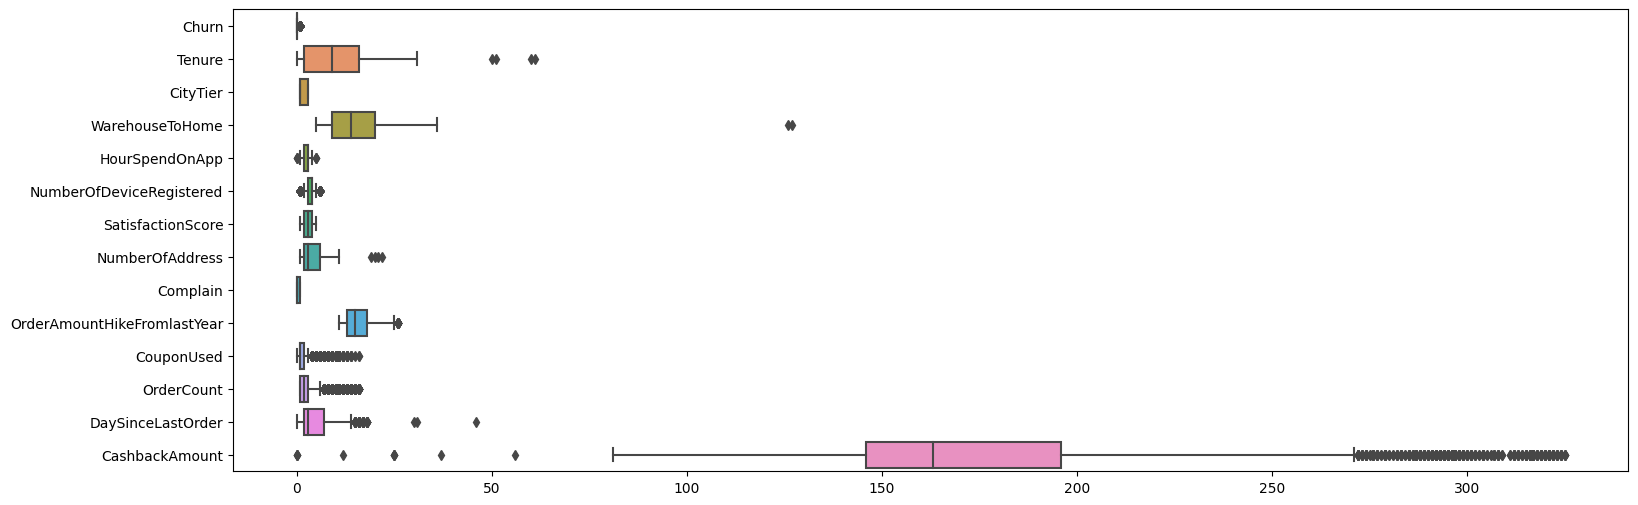

In [16]:
plt.figure(figsize=(18,6))
sns.boxplot(data=df, orient="h")
plt.show()

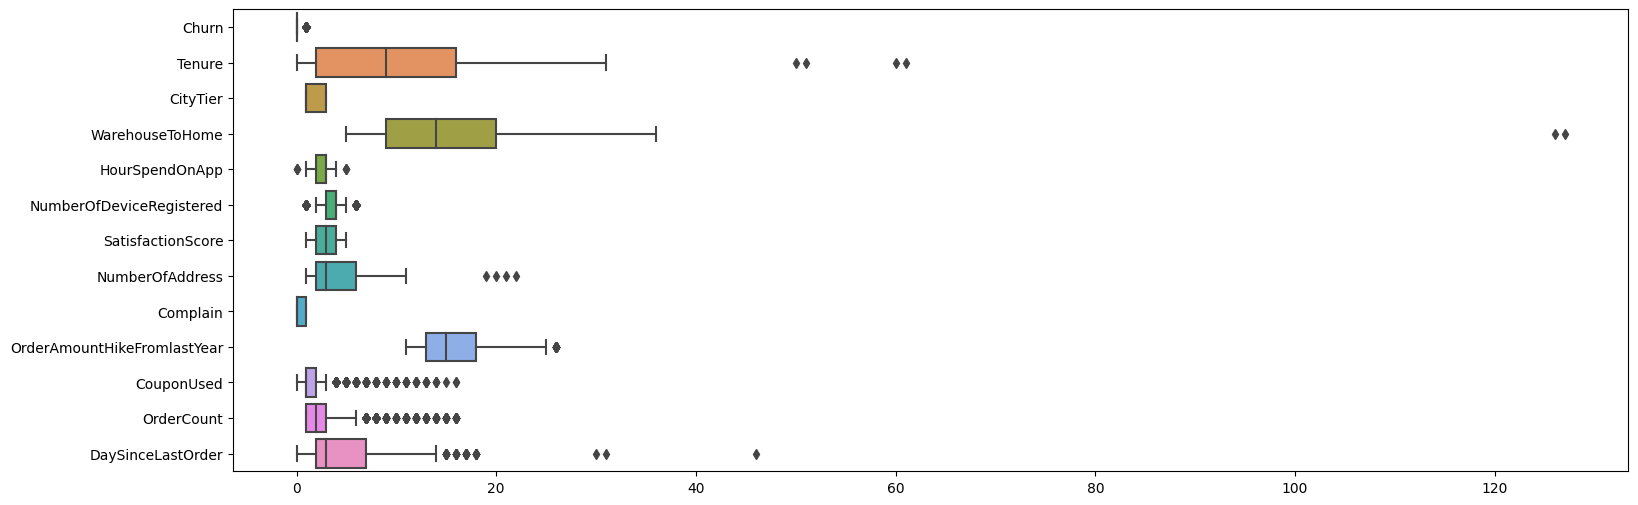

In [17]:
# remove CashbackAmount so we can see the other variables better
plt.figure(figsize=(18,6))
sns.boxplot(data=df.drop("CashbackAmount", axis=1), orient="h")
plt.show()

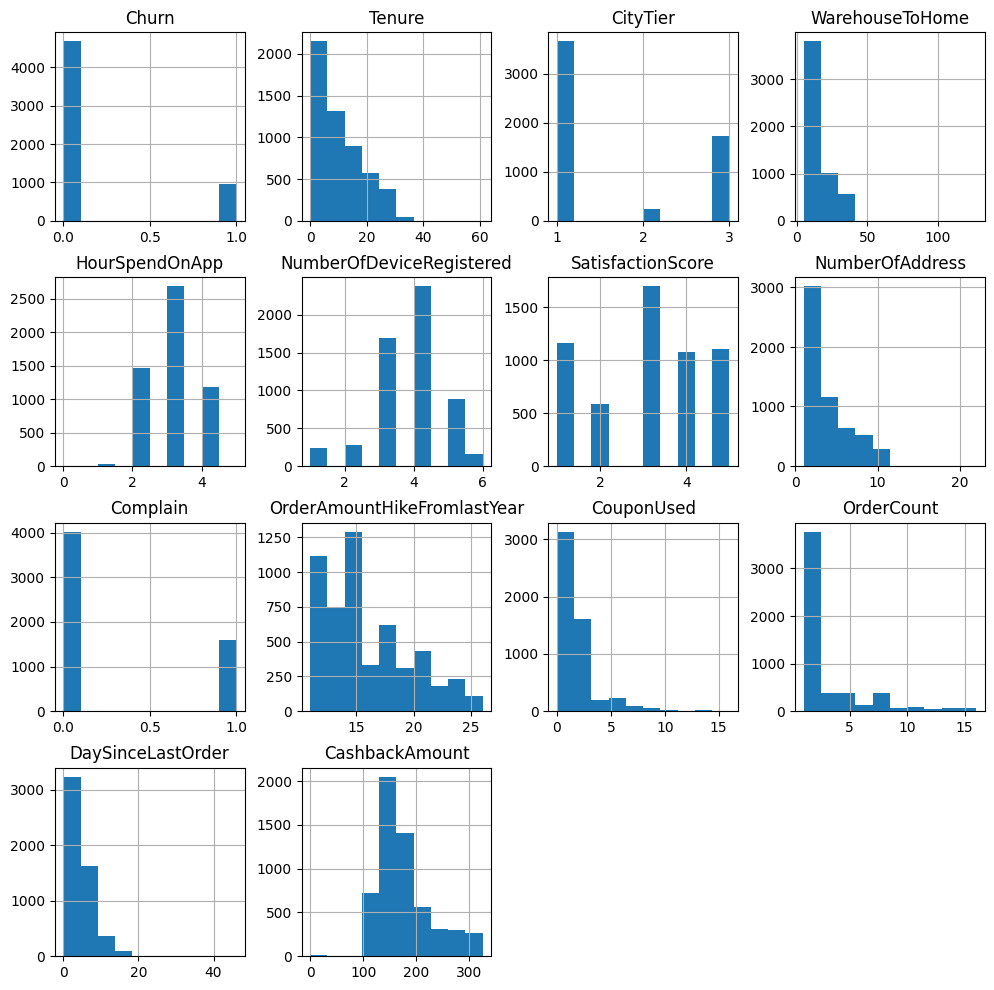

In [18]:
df.hist(figsize=(12, 12))
plt.show()

## Data Preparation

### Missing Values

In [19]:
#df['Churn'] = df['Churn'].astype('object')
#df['CityTier'] = df['CityTier'].astype('object')
#df['Complain'] = df['Complain'].astype('object')

In [20]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [21]:
df['Churn'].value_counts()

0    4682
1     948
Name: Churn, dtype: int64

In [22]:
df.isnull().sum().sort_values(ascending=False)

Churn                          0
SatisfactionScore              0
DaySinceLastOrder              0
OrderCount                     0
CouponUsed                     0
OrderAmountHikeFromlastYear    0
Complain                       0
NumberOfAddress                0
MaritalStatus                  0
PreferedOrderCat               0
Tenure                         0
NumberOfDeviceRegistered       0
HourSpendOnApp                 0
Gender                         0
PreferredPaymentMode           0
WarehouseToHome                0
CityTier                       0
PreferredLoginDevice           0
CashbackAmount                 0
dtype: int64

### Outliers

In [23]:
def outlier_boundry(col):
    sorted(col)
    Q1, Q3 = np.percentile(col,[25,75])
    IQR = Q3-Q1
    lr = Q1-(1.5 * IQR)
    ur = Q3+(1.5 * IQR)
    return lr, ur

In [24]:
ignore = [ "Churn" ]
for c in df.columns:
    if c not in ignore and df[c].dtype != 'object': 
        lr, ur = outlier_boundry(df[c])
        df[c] = np.where(df[c] > ur, ur, df[c])
        df[c] = np.where(df[c] < lr, lr, df[c])

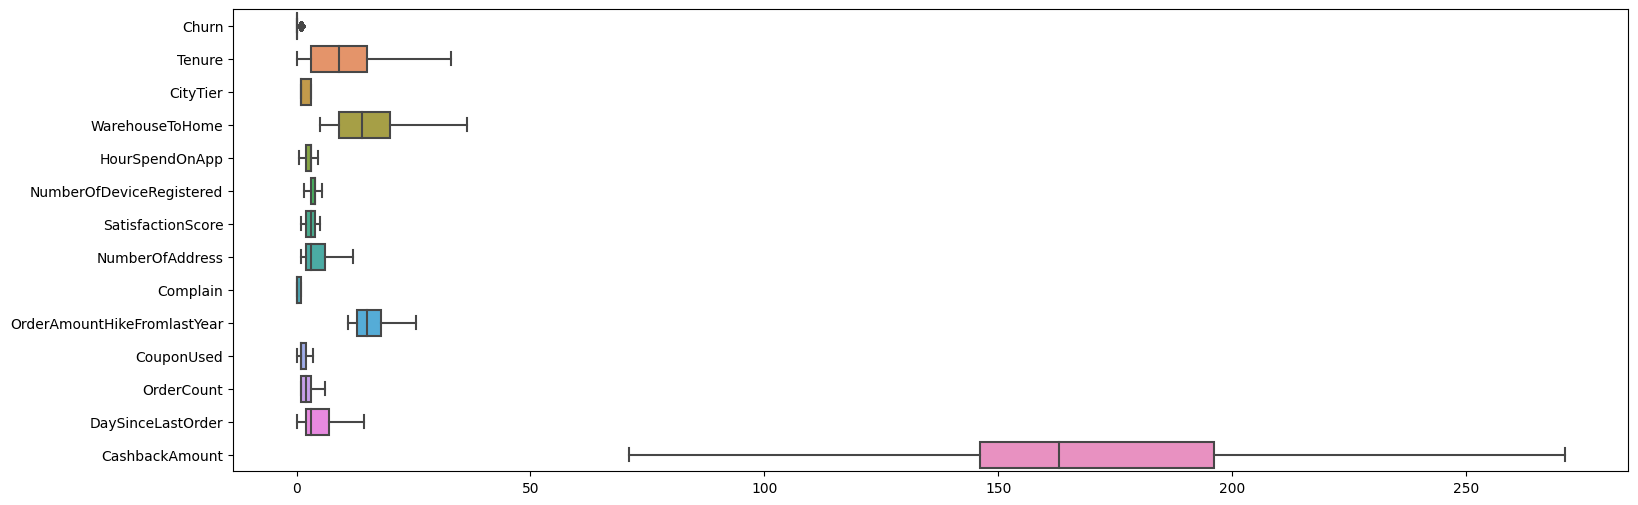

In [25]:
plt.figure(figsize=(18,6))
sns.boxplot(data=df, orient="h")
plt.show()

## Comparison to Churn

In [26]:
# calulate the overall churn percentage 
v = df.Churn.value_counts()
churn_rate = v[1] / v[0] * 100
print(f"Overall churn rate: {churn_rate.round(2)}%")

Overall churn rate: 20.25%


In [27]:
def churn_plot(var, data):
    
    # build a dataframe with the grouped data we need
    d = pd.DataFrame({
        "Churned": data.groupby(var).Churn.sum(),
        "Total": data[var].value_counts(),
        "Pct": data.groupby(var).Churn.sum()*100 / data[var].value_counts()
    })
    
    # create the plot
    fig, ax = plt.subplots(figsize=(6,3))

    part1 = ax.bar(d.index, d['Total'], color='lightgrey', label='Total count')
    #part2 = ax.bar(d.index, d['Churned'], color='lightskyblue', label='Churned count')
    part2 = ax.bar(d.index, d['Churned'], color='dodgerblue', label='Churned count')
    ax.set_xlabel(var)
    ax.set_ylabel('No. of customers')
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    ax2 = ax.twinx()
    ax2.set_ylim(0, d['Pct'].max()+5)
    part3 = ax2.plot(d.index, d['Pct'], color='orangered', linewidth=2, label='Churn percentage')
    part4 = ax2.axhline(y = churn_rate, color='orangered', linestyle='--', linewidth=1, label="Overall churn rate")
    ax2.set_ylabel('Percentage of Customers Churned')

    fig.legend(loc="center left", bbox_to_anchor=(1, 0.77))
    plt.title(f"Customer Churn compared to {var}")
    plt.show()


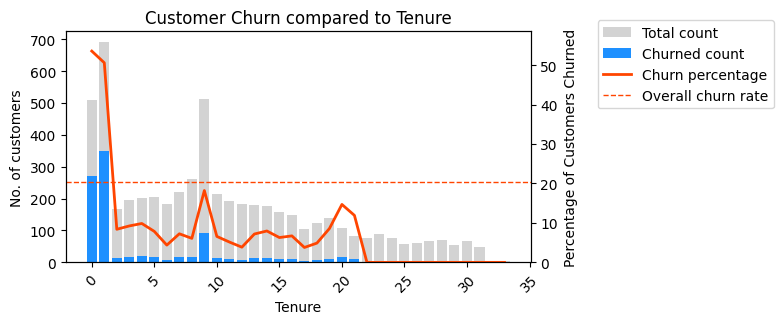

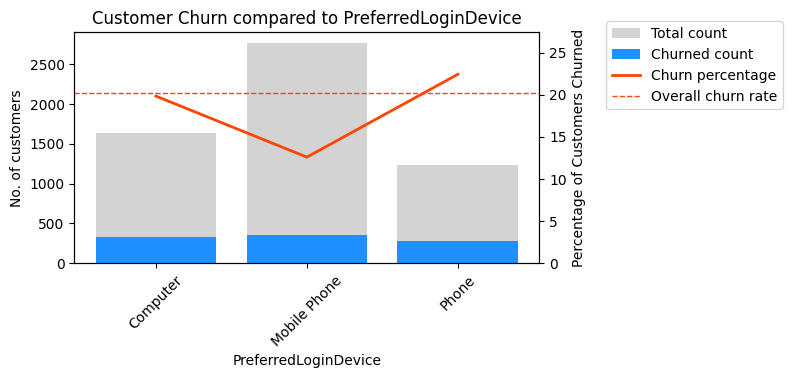

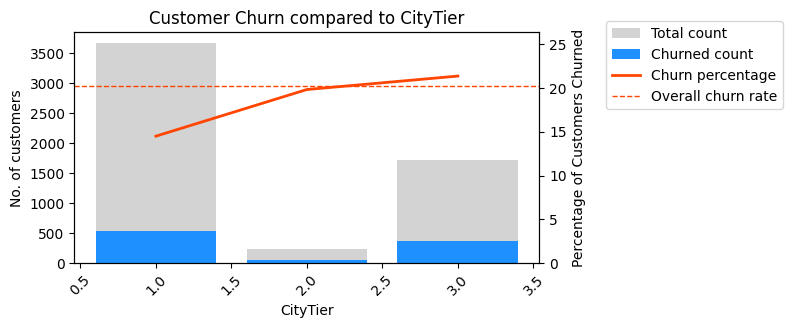

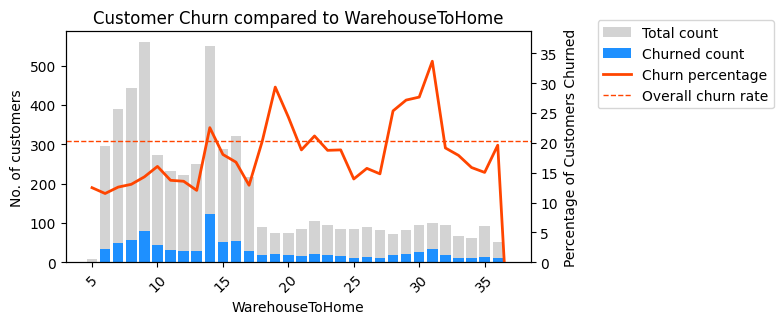

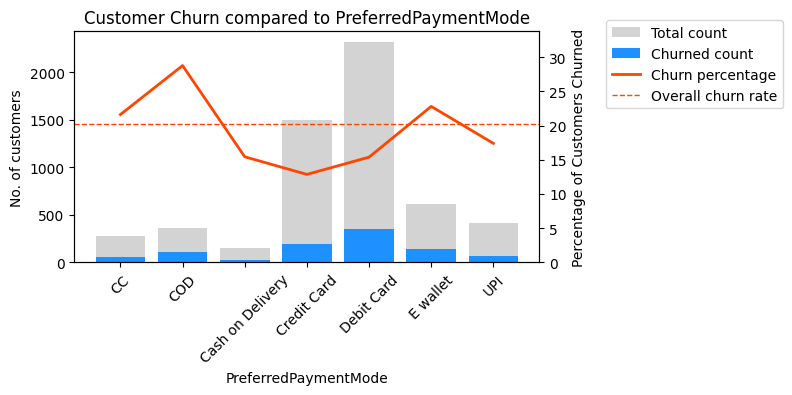

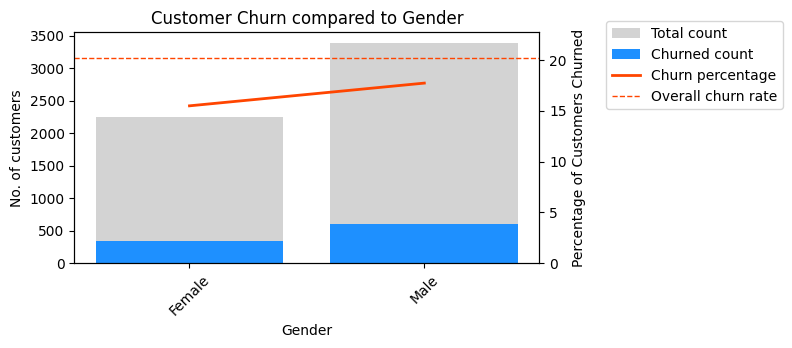

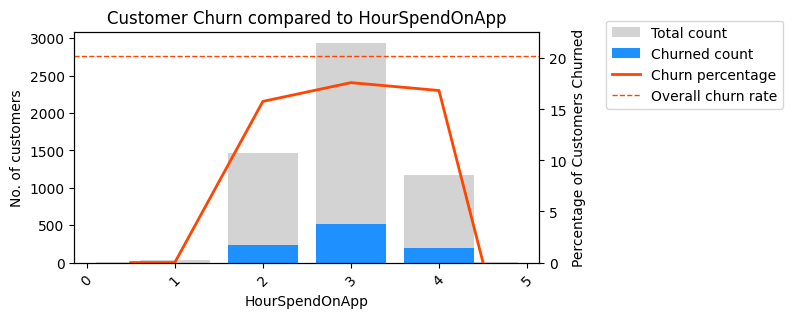

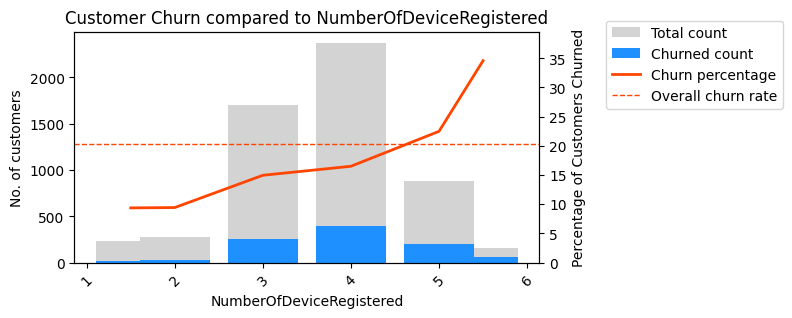

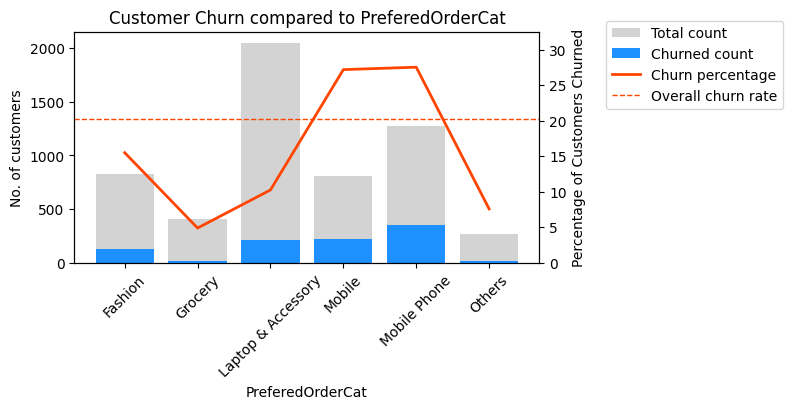

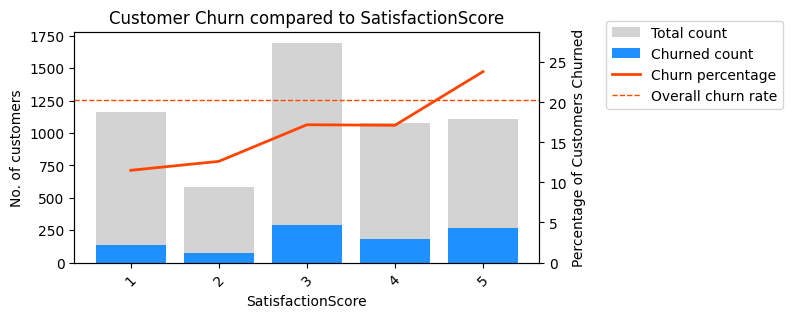

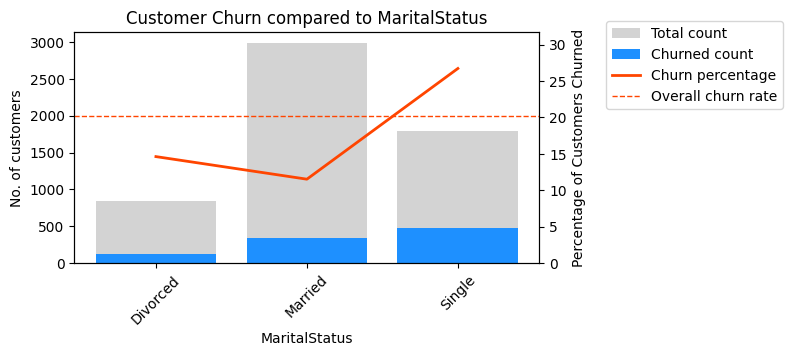

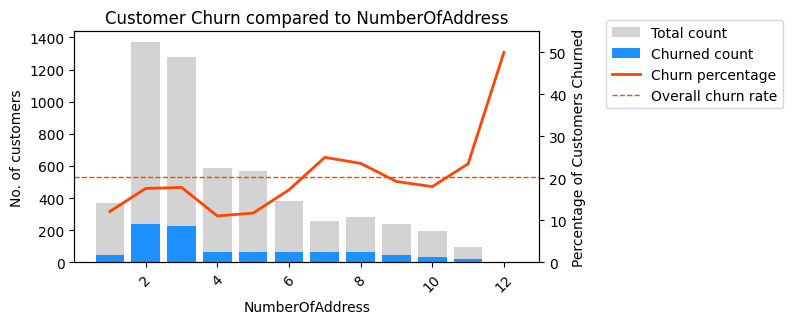

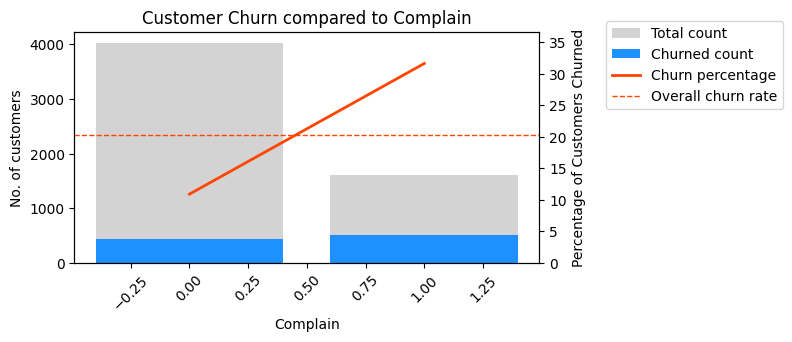

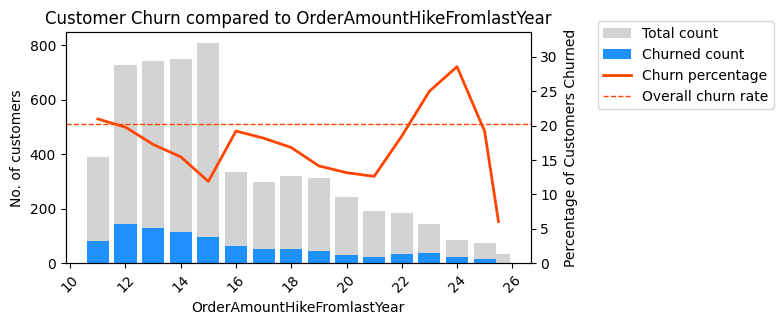

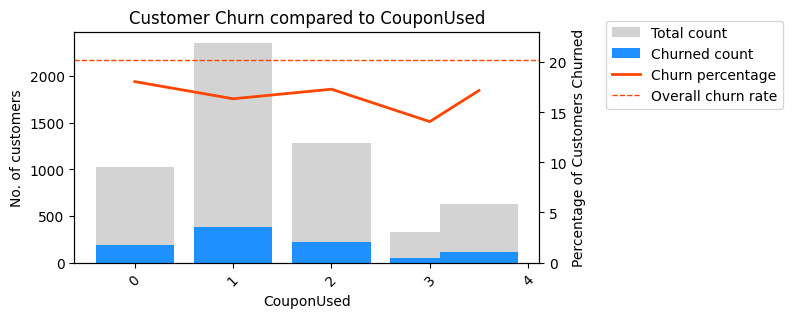

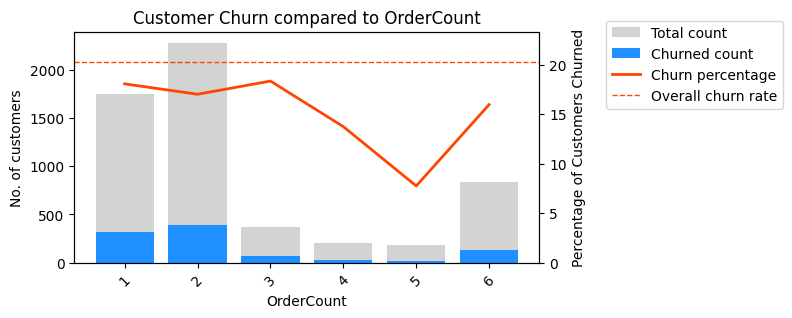

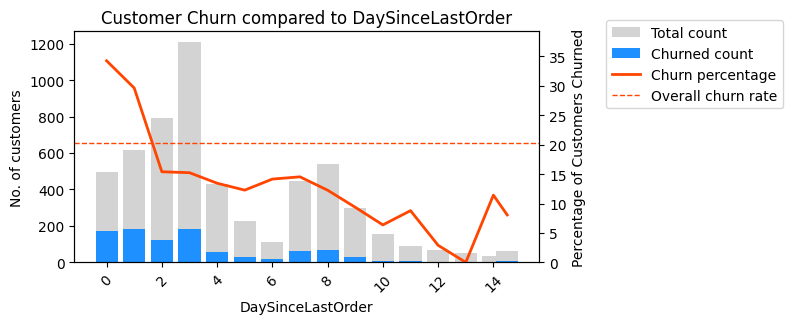

In [28]:
ignore = [ "Churn", "CashbackAmount" ]
for c in df.columns:
    if c not in ignore:
        churn_plot(c, df)


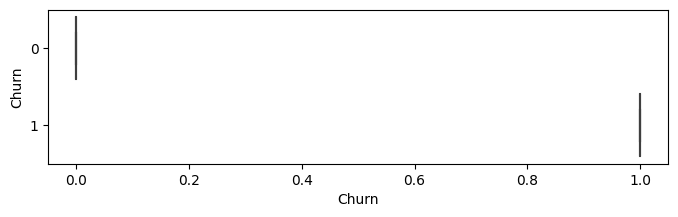

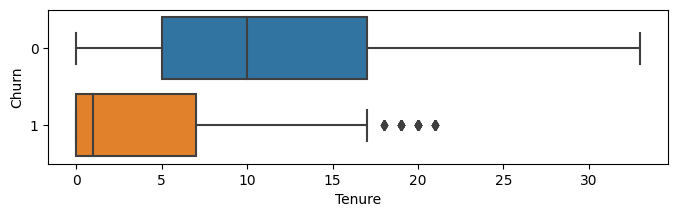

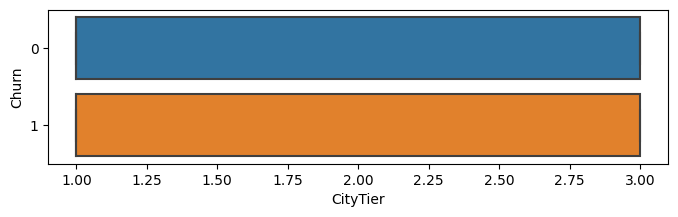

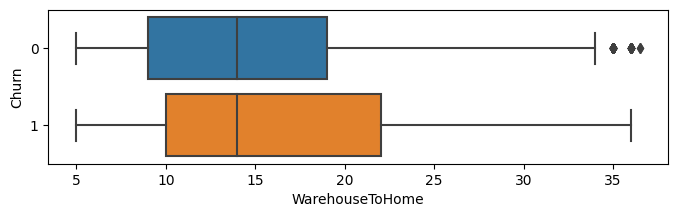

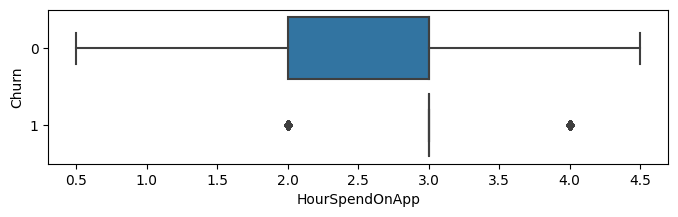

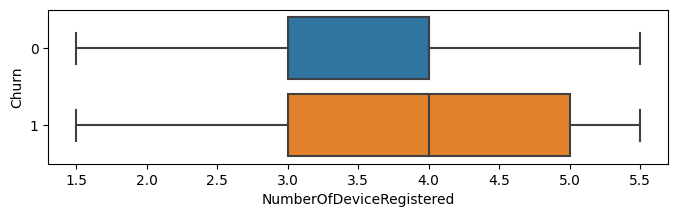

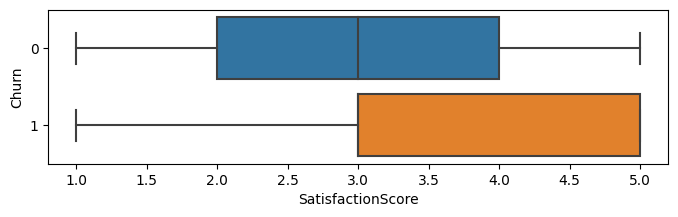

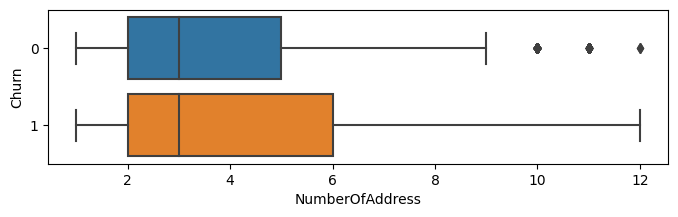

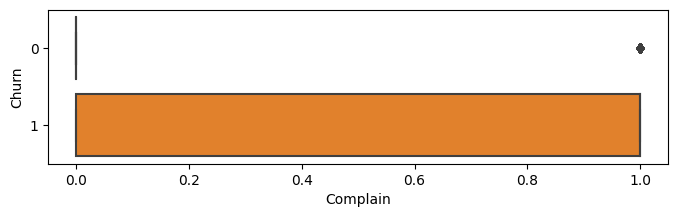

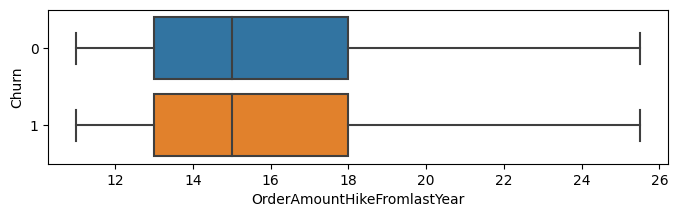

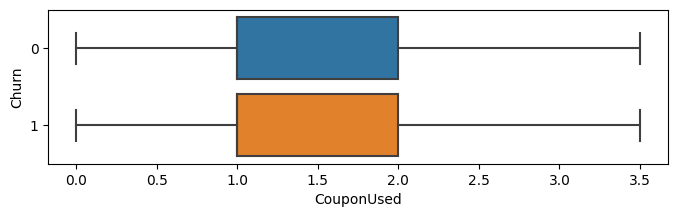

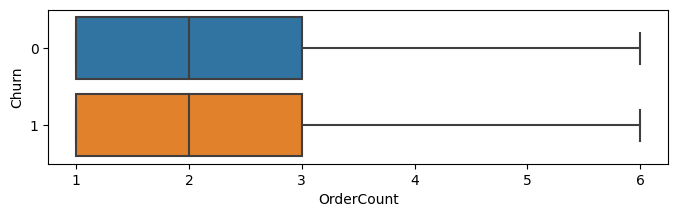

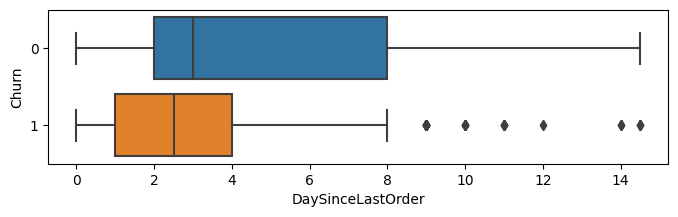

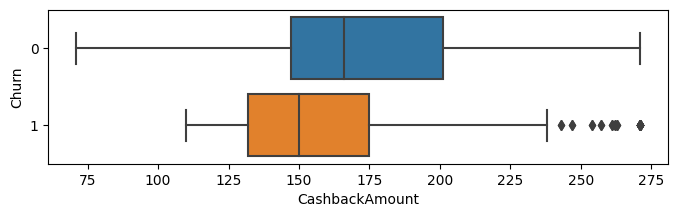

In [29]:
for c in df.columns:
    if df[c].dtype in ("float64", "int64"):
        plt.figure(figsize=(8, 2))
        sns.boxplot(data=df, x=c, y="Churn", orient="h")
        plt.show()

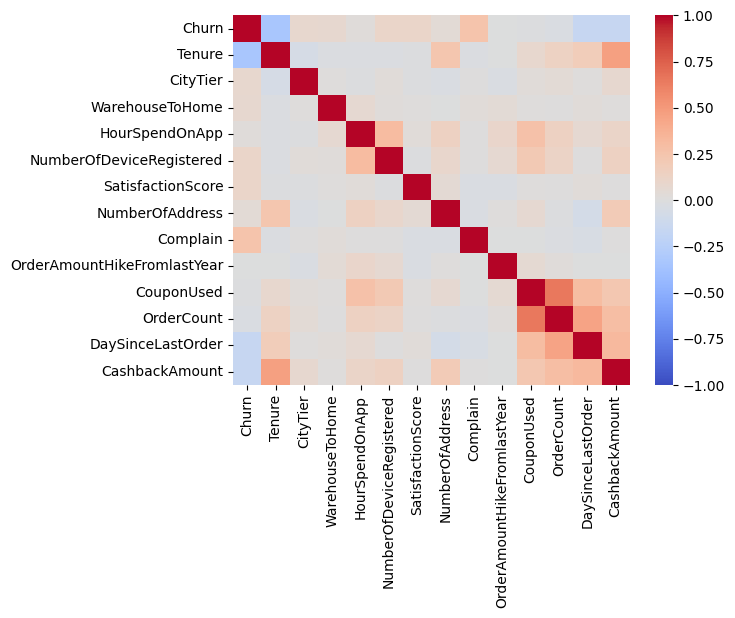

In [30]:
cor = df.corr(numeric_only=True)
sns.heatmap(cor, cmap="coolwarm", vmin=-1, vmax=1)
plt.show()

## Encoding

In [31]:
df_enc = df.copy()
df_enc.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3.0,6.0,Debit Card,Female,3.0,3.0,Laptop & Accessory,2.0,Single,9.0,1.0,11.0,1.0,1.0,5.0,160.0
1,1,9.0,Phone,1.0,8.0,UPI,Male,3.0,4.0,Mobile,3.0,Single,7.0,1.0,15.0,0.0,1.0,0.0,121.0
2,1,9.0,Phone,1.0,30.0,Debit Card,Male,2.0,4.0,Mobile,3.0,Single,6.0,1.0,14.0,0.0,1.0,3.0,120.0
3,1,0.0,Phone,3.0,15.0,Debit Card,Male,2.0,4.0,Laptop & Accessory,5.0,Single,8.0,0.0,23.0,0.0,1.0,3.0,134.0
4,1,0.0,Phone,1.0,12.0,CC,Male,3.0,3.0,Mobile,5.0,Single,3.0,0.0,11.0,1.0,1.0,3.0,130.0


In [32]:
#df_enc = pd.get_dummies(df_enc, drop_first=True)
df_enc = pd.get_dummies(df)
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 35 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Churn                                  5630 non-null   int64  
 1   Tenure                                 5630 non-null   float64
 2   CityTier                               5630 non-null   float64
 3   WarehouseToHome                        5630 non-null   float64
 4   HourSpendOnApp                         5630 non-null   float64
 5   NumberOfDeviceRegistered               5630 non-null   float64
 6   SatisfactionScore                      5630 non-null   float64
 7   NumberOfAddress                        5630 non-null   float64
 8   Complain                               5630 non-null   float64
 9   OrderAmountHikeFromlastYear            5630 non-null   float64
 10  CouponUsed                             5630 non-null   float64
 11  Orde

In [33]:
df_enc.head(10)

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1,4.0,3.0,6.0,3.0,3.0,2.0,9.0,1.0,11.0,...,0,0,0,1,0,0,0,0,0,1
1,1,9.0,1.0,8.0,3.0,4.0,3.0,7.0,1.0,15.0,...,1,0,0,0,1,0,0,0,0,1
2,1,9.0,1.0,30.0,2.0,4.0,3.0,6.0,1.0,14.0,...,1,0,0,0,1,0,0,0,0,1
3,1,0.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0,23.0,...,1,0,0,1,0,0,0,0,0,1
4,1,0.0,1.0,12.0,3.0,3.0,5.0,3.0,0.0,11.0,...,1,0,0,0,1,0,0,0,0,1
5,1,0.0,1.0,22.0,3.0,5.0,5.0,2.0,1.0,22.0,...,0,0,0,0,0,1,0,0,0,1
6,1,9.0,3.0,11.0,2.0,3.0,2.0,4.0,0.0,14.0,...,1,0,0,1,0,0,0,1,0,0
7,1,9.0,1.0,6.0,3.0,3.0,2.0,3.0,1.0,16.0,...,1,0,0,0,1,0,0,1,0,0
8,1,13.0,3.0,9.0,3.0,4.0,3.0,2.0,1.0,14.0,...,1,0,0,0,1,0,0,1,0,0
9,1,9.0,1.0,31.0,2.0,5.0,3.0,2.0,0.0,12.0,...,1,0,0,0,1,0,0,0,0,1


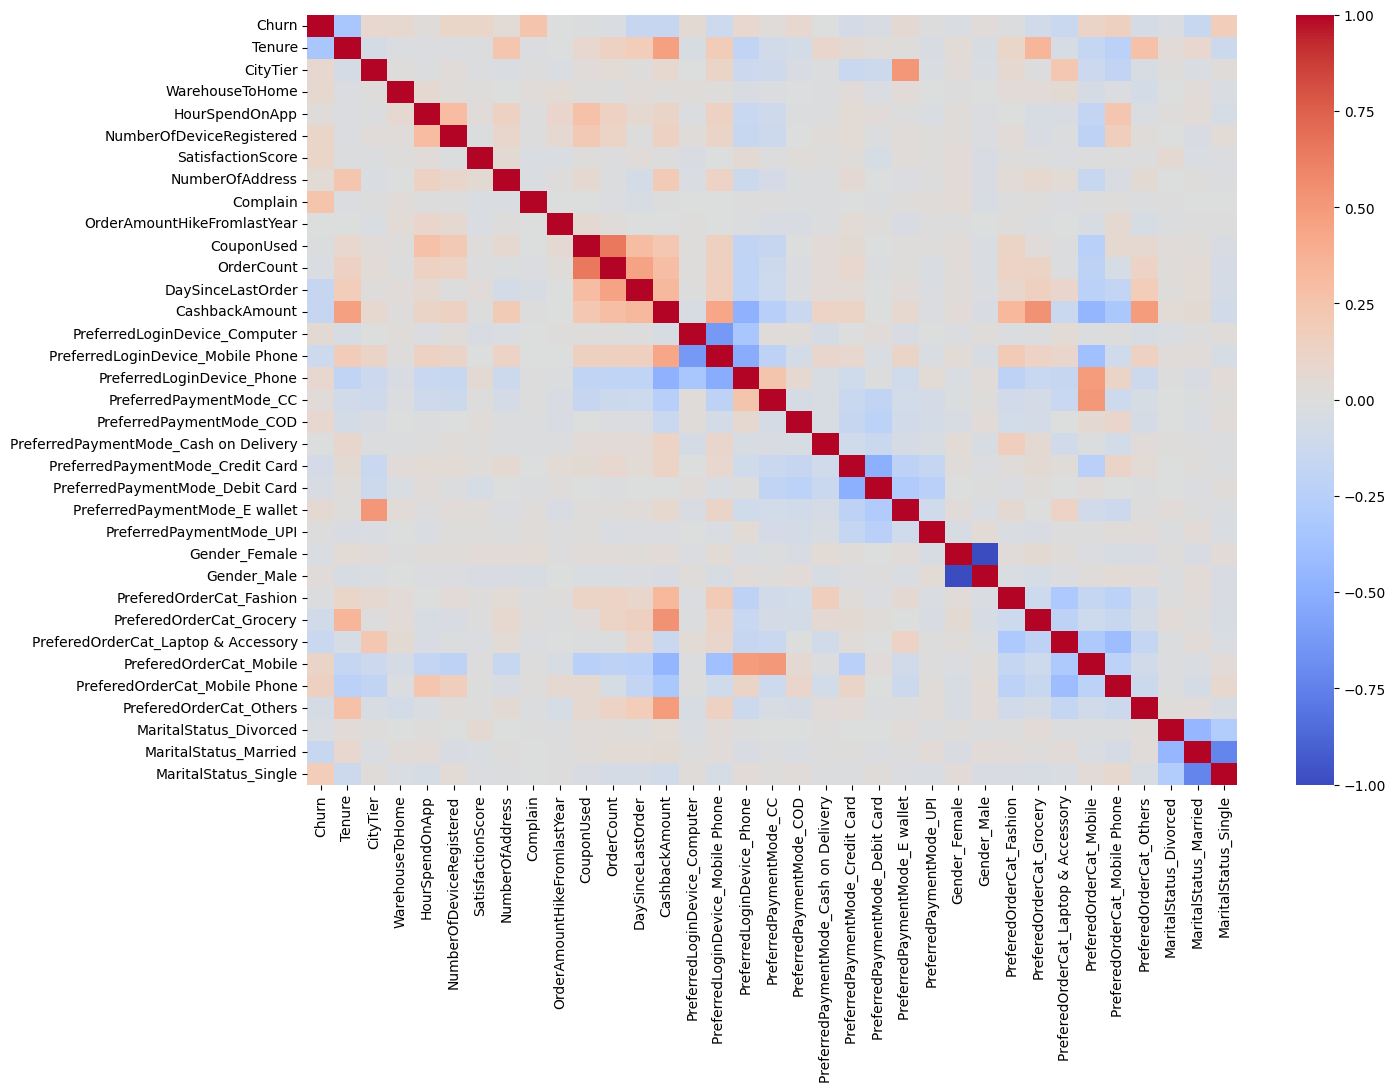

In [34]:
cor = df_enc.corr(numeric_only=True)
plt.figure(figsize=(15,10))
sns.heatmap(cor, cmap="coolwarm", vmin=-1, vmax=1)
plt.show()

### t-SNE

In [35]:
%%time
from sklearn.manifold import TSNE

df_tsne = df_enc.drop("Churn", axis=1)

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_tsne)
df_tsne_results = pd.DataFrame(tsne_results)
df_tsne_results["Churn"] = df["Churn"]
print("-----------------------")

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5630 samples in 0.001s...
[t-SNE] Computed neighbors for 5630 samples in 0.870s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5630
[t-SNE] Computed conditional probabilities for sample 2000 / 5630
[t-SNE] Computed conditional probabilities for sample 3000 / 5630
[t-SNE] Computed conditional probabilities for sample 4000 / 5630
[t-SNE] Computed conditional probabilities for sample 5000 / 5630
[t-SNE] Computed conditional probabilities for sample 5630 / 5630
[t-SNE] Mean sigma: 4.396897
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.417595
[t-SNE] KL divergence after 300 iterations: 2.120042
-----------------------
CPU times: user 1min 59s, sys: 29.7 s, total: 2min 29s
Wall time: 23.7 s


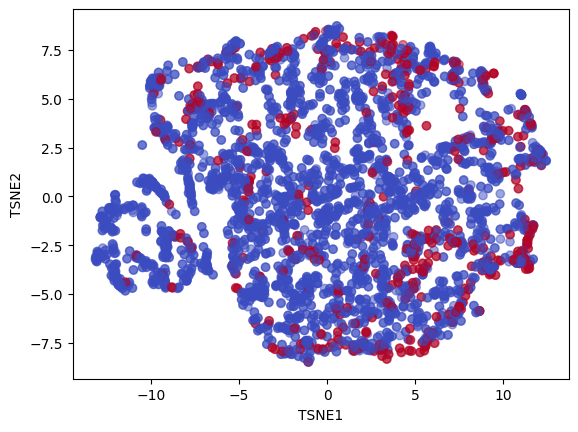

In [36]:
plt.scatter(df_tsne_results[0], df_tsne_results[1], c=df_tsne_results["Churn"], cmap="coolwarm", alpha=0.5)
plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
plt.show()

## Model Creation

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix

### Split train and test data

In [38]:
X = df_enc.drop("Churn", axis=1)
y = df_enc['Churn']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [40]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X_train: (4222, 34)
Shape of X_test: (1408, 34)


### PCA

In [41]:
%%time

from sklearn.decomposition import PCA

#pca = PCA(n_components=2)
pca = PCA()
data_pca = pca.fit_transform(X)
data_pca = pd.DataFrame(data_pca)
print("-----------------------")

-----------------------
CPU times: user 5.63 s, sys: 6.45 s, total: 12.1 s
Wall time: 1.7 s


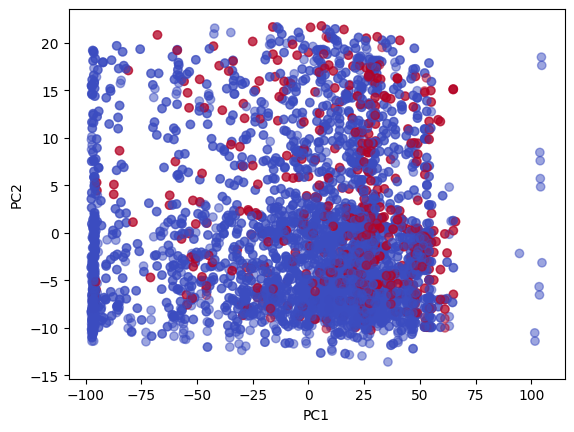

In [42]:
plt.scatter(data_pca[0], data_pca[1], c=df_enc["Churn"], alpha=0.5, cmap="coolwarm")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

### Logistic Regression

In [43]:
model_lr = LogisticRegression(max_iter=500)
model_lr.fit(X_train, y_train)
model_lr.score(X_test, y_test)

/home/cbowers/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8856534090909091

In [44]:
y_pred_lr = model_lr.predict(X_test)
score_lr = metrics.accuracy_score(y_test, y_pred_lr)
print(metrics.classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1175
           1       0.75      0.46      0.57       233

    accuracy                           0.89      1408
   macro avg       0.83      0.71      0.75      1408
weighted avg       0.88      0.89      0.87      1408



In [45]:
metrics.confusion_matrix(y_pred_lr, y_test)

array([[1140,  126],
       [  35,  107]])

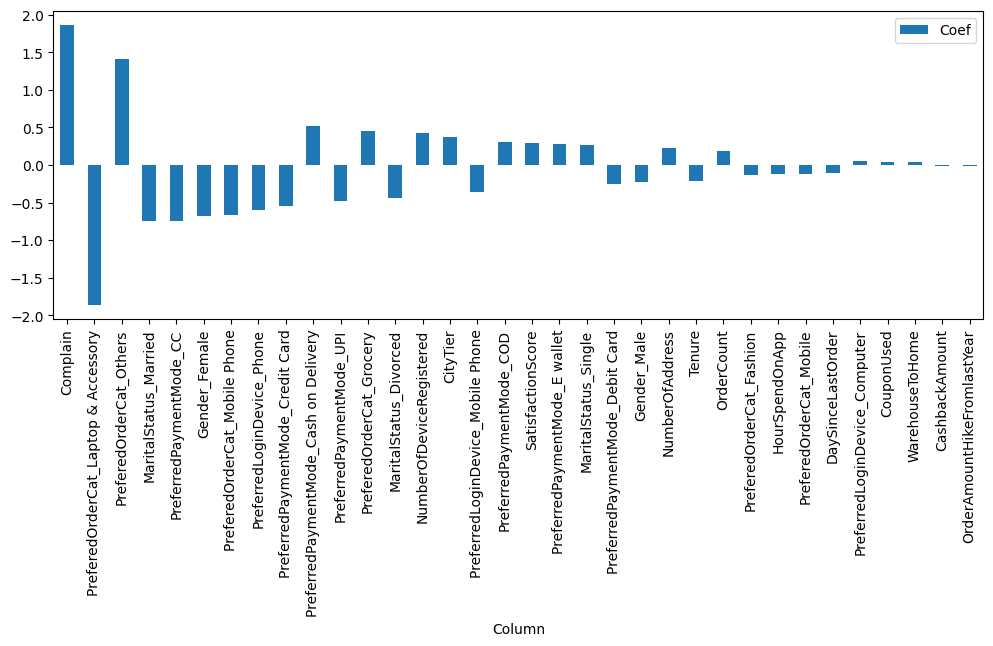

In [54]:
df_coef_lr = pd.DataFrame({
    "Column": X_train.columns,
    "Coef": model_lr.coef_[0],
    "AbsCoef": abs(model_lr.coef_[0]),
})
df_coef_lr.sort_values(by='AbsCoef', ascending=False, inplace=True)
df_coef_lr.plot.bar(x="Column", y="Coef", figsize=(12,4))
plt.show()

### Decision Tree Classifier

In [47]:
model_cart = DecisionTreeClassifier(random_state=0)
model_cart = model_cart.fit(X_train, y_train)
model_cart.score(X_test, y_test)

0.9467329545454546

In [48]:
y_pred_cart = model_cart.predict(X_test)
score_cart = metrics.accuracy_score(y_test, y_pred_cart)
print(metrics.classification_report(y_test, y_pred_cart))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1175
           1       0.86      0.81      0.83       233

    accuracy                           0.95      1408
   macro avg       0.91      0.89      0.90      1408
weighted avg       0.95      0.95      0.95      1408



In [49]:
metrics.confusion_matrix(y_pred_cart, y_test)

array([[1144,   44],
       [  31,  189]])

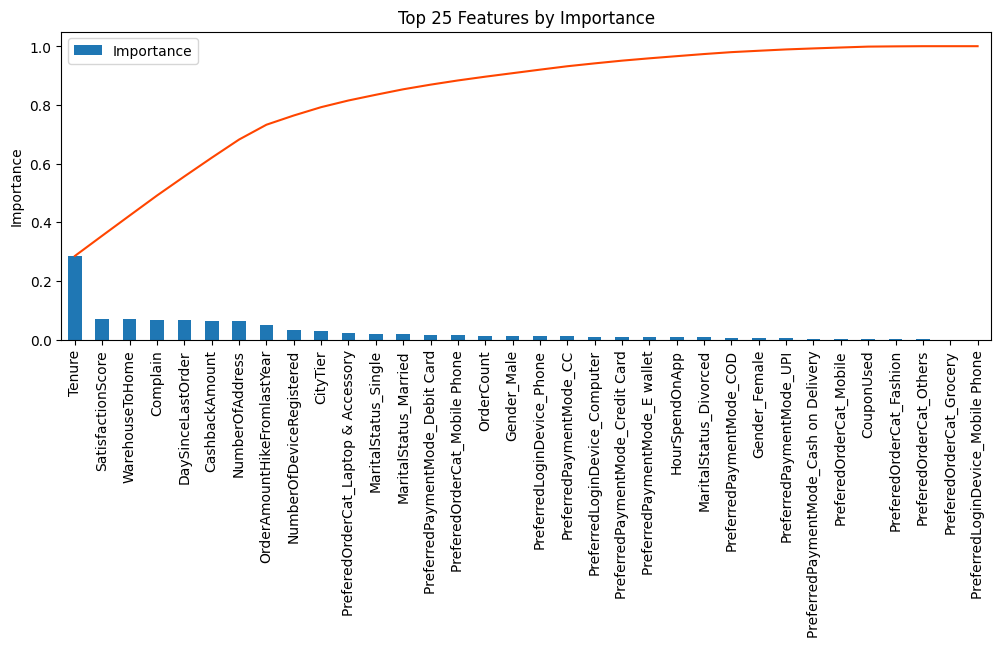

In [50]:
imp_df = pd.DataFrame(
    model_cart.feature_importances_, 
    index = X_train.columns, 
    columns = ["Importance"]
)
imp_df.sort_values(by='Importance', ascending=False, inplace=True)
imp_df.plot(kind='bar', figsize=(12, 4))
imp_df["Importance"].cumsum().plot(c="orangered", label="Cumulative Importance")
plt.xticks(rotation="vertical")
plt.ylabel("Importance")
plt.title("Top 25 Features by Importance")
plt.show()

### Random Forest Classifier